In [1]:
import pandas as pd
file = open('galacticplane/data.txt', 'r')
obsdf = pd.DataFrame()
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    oids.append(arr[0])
    ras.append(float(arr[1])*(15.) + float(arr[2])*(15./60.) + float(arr[3])*(15./360.))
    decs.append(float(arr[4]) + float(arr[5])/60. + float(arr[6])/360.)
    stimes.append(arr[7] + ' ' + arr[8])
#     modes.append(arr[12])
obsdf['obsid'] = oids
obsdf['ra'] = ras
obsdf['dec'] = decs
obsdf['start time'] = stimes
# obsdf['mode'] = modes
obsdf

,obsid,ra,dec,start time
0,0763880101,274.342500,-22.404444,2016-04-06 05:07:57
1,0811213501,297.088333,20.935000,2018-03-29 09:19:41
2,0840210601,132.970417,-43.879167,2019-12-12 15:22:14
3,0861460101,131.991250,-44.866111,2020-06-01 19:28:21
4,0801682401,270.207083,-29.511111,2018-09-02 15:02:55
...,...,...,...,...
371,0780070601,275.056667,-10.218889,2016-10-12 14:47:12
372,0821271001,105.000000,0.000000,2019-04-27 12:01:44
373,0821270901,105.000000,0.000000,2019-04-25 11:59:52
374,0803031601,304.999583,38.450000,2017-05-01 09:06:05


In [3]:
import pandas as pd
import os
df = pd.read_csv('gw150914/probmap.csv')
dflikely = df[(df.b < 2) & (df.b > -2) & (df.prob > 0.000001)]
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,prob,ra,dec,b
0,0,0,0,6.648600e-49,0,-90,-60.188552
1,1,1,1,6.648600e-49,1,-90,-59.269006
2,2,2,2,6.648600e-49,2,-90,-58.345046
3,3,3,3,6.648600e-49,3,-90,-57.417050
4,4,4,4,6.648600e-49,4,-90,-56.485356
...,...,...,...,...,...,...,...
64795,64795,64795,64795,0.000000e+00,355,89,-64.227902
64796,64796,64796,64796,0.000000e+00,356,89,-63.352159
64797,64797,64797,64797,0.000000e+00,357,89,-62.468550
64798,64798,64798,64798,0.000000e+00,358,89,-61.577811


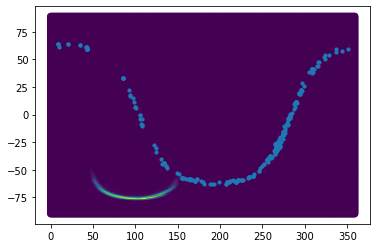

<Figure size 432x288 with 0 Axes>

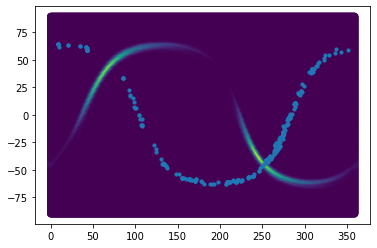

<Figure size 432x288 with 0 Axes>

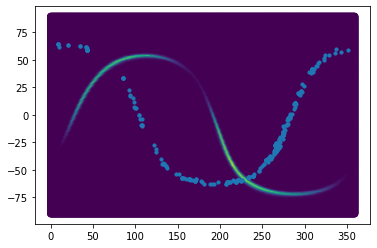

<Figure size 432x288 with 0 Axes>

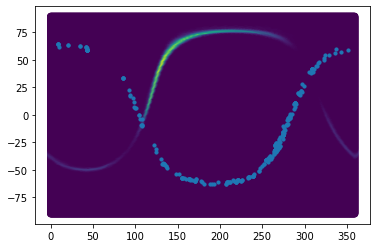

<Figure size 432x288 with 0 Axes>

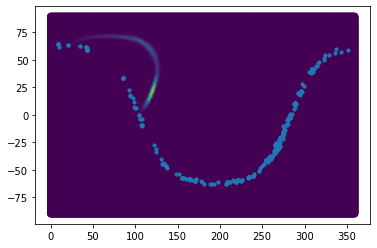

<Figure size 432x288 with 0 Axes>

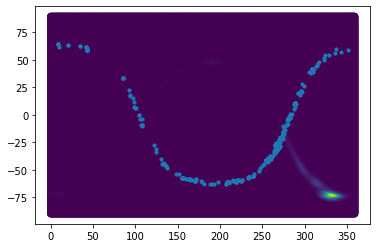

<Figure size 432x288 with 0 Axes>

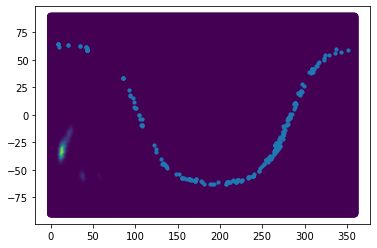

<Figure size 432x288 with 0 Axes>

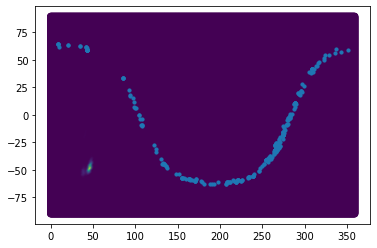

<Figure size 432x288 with 0 Axes>

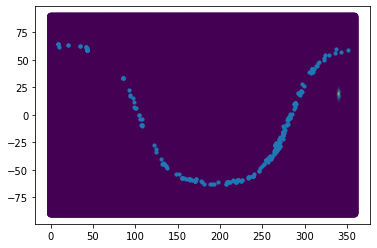

<Figure size 432x288 with 0 Axes>

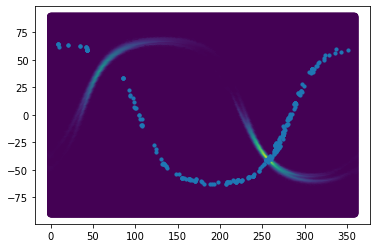

<Figure size 432x288 with 0 Axes>

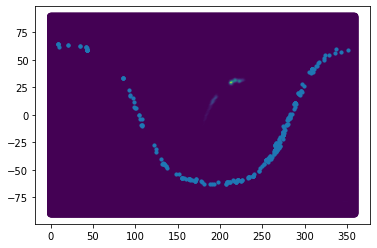

<Figure size 432x288 with 0 Axes>

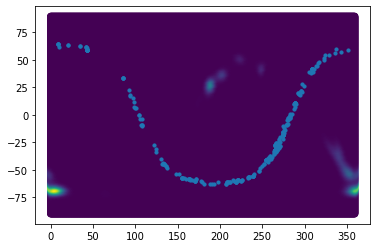

<Figure size 432x288 with 0 Axes>

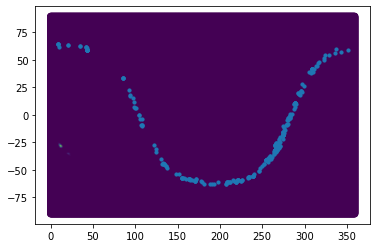

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
for dir in os.listdir('.'):
    if 'gw' in dir:
        df = pd.read_csv(dir + '/probmap.csv')
        dflikely = df[(df.b < 2) & (df.b > -2) & (df.prob > 0.000001)]
        plt.figure()
        plt.scatter(df['ra'], df['dec'], c=df['prob'])
        plt.scatter(obsdf['ra'], obsdf['dec'], s=10)
        plt.show()
        plt.clf()

In [ ]:
gws = ['150914', '151012', '151226', '170104', '170608', '170729', '170809', '170814', '170818', '170823',
      '190412', '190521', '190814']

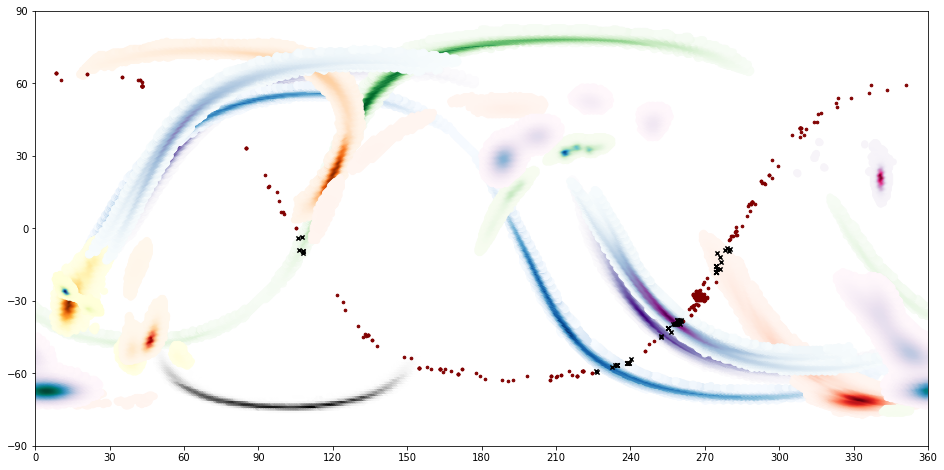

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.figure(figsize=(16, 8))
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.yticks(range(-90, 91, 30))
plt.xticks(range(0, 361, 30))

cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'OrRd', 'PuRd', 'BuPu', 'GnBu', 'PuBuGn', 'YlGnBu']
i = 0
for dir in os.listdir('.'):
    if 'gw' in dir:
        df = pd.read_csv(dir + '/probmap.csv')
        probmaplikely = df[(df.b < 2) & (df.b > -2) & (df.prob > 0.001)]
        probmaplikely = df[df.prob > 10**-4]
        plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap=cmaps[i])
#         if np.linalg.norm([prow['ra']-row['ra'], prow['dec']-row['dec']]) < 2: #if observation falls within 2 degrees of GW probability regions
#             ax[i//3][i%3].scatter(row['ra'], row['dec'], s=20, color='black', marker='x')
#         else:
#             plt.scatter(row['ra'], row['dec'], s=7, color='maroon')
        i += 1

for i, row in obsdf.iterrows():
    if (row.ra>95 and row.ra<115 and row.dec>-20 and row.dec<0):
        plt.scatter(row['ra'], row['dec'], s=18, color='black', marker='x')
    elif (row.ra>225 and row.ra<242 and row.dec>-70 and row.dec<-50):
        plt.scatter(row['ra'], row['dec'], s=18, color='black', marker='x')
    elif (row.ra>250 and row.ra<261 and row.dec>-50 and row.dec<-35):
        plt.scatter(row['ra'], row['dec'], s=18, color='black', marker='x')
    elif (row.ra>270 and row.ra<290 and row.dec>-20 and row.dec<-5):
        plt.scatter(row['ra'], row['dec'], s=18, color='black', marker='x')
    else:
        plt.scatter(row['ra'], row['dec'], s=7, color='maroon')

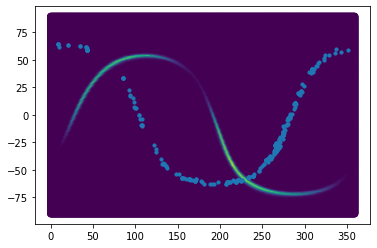

In [30]:
df = pd.read_csv('gw151226/probmap.csv')
dflikely = df[(df.b < 2) & (df.b > -2) & (df.prob > 0.000001)]
plt.figure()
plt.scatter(df['ra'], df['dec'], c=df['prob'])
plt.scatter(obsdf['ra'], obsdf['dec'], s=10)
plt.show()

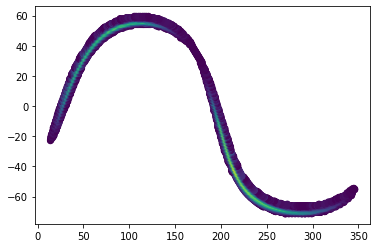

In [64]:
# for i, prow in df[(df.b < 2) & (df.b > -2) & (df.prob > 0.000001)].iterrows():
#     print(str(prow['ra'])+', '+str(prow['dec']))
dflikely = df[(df.prob > 10**-4)]
plt.scatter(dflikely['ra'], dflikely['dec'], c=dflikely['prob'])
plt.show()

In [65]:
from shutil import copyfile
for dir in os.listdir('.'):
    if 'gw' in dir:
        print(dir)
        df = pd.read_csv(dir + '/probmap.csv')
        dflikely = df[df.prob > 10**-4]
        for i, row in obsdf.iterrows():
            for j, prow in dflikely.iterrows():
                if np.linalg.norm([prow['ra']-row['ra'], prow['dec']-row['dec']]) < 2: #if observation falls within 2 degrees of GW probability regions
                    obsid = row['obsid']
                    print('\t' + str(row['ra']) + ', ' + str(row['dec']))
                    try:
                        for file in os.listdir('galacticplane/' + obsid + '/PPS/'):
                            if 'IMAGE' in file:
                                copyfile('galacticplane/' + obsid + '/PPS/' + file, 'galacticplane/images/' + dir + '/' + file)
                    except:
                        'file not found'

gw150914
	154.68458333333334, -57.84444444444445
	154.68458333333334, -57.84444444444445
	154.68458333333334, -57.84444444444445
	154.68458333333334, -57.84444444444445
	154.68458333333334, -57.84444444444445
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.66027777777778
	154.70708333333334, -57.660277

	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333

	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556
	255.02541666666667, -41.16555555555556


	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222
	234.57166666666666, -56.64972222222222


gw170104
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83958333333334, -10.172777777777776
	107.83

	20.829166666666666, 63.800000000000004
	20.829166666666666, 63.800000000000004
	20.829166666666666, 63.800000000000004
	20.829166666666666, 63.800000000000004
	20.829166666666666, 63.800000000000004
	20.825, 63.825
	20.825, 63.825
	20.825, 63.825
	20.825, 63.825
	20.825, 63.825
	20.825, 63.825
	20.825, 63.825
	20.825, 63.825
	20.825, 63.825
	20.825, 63.825
	20.825, 63.825
	20.825, 63.825
	20.825, 63.825
	20.825, 63.825
	20.825, 63.825
gw170729
	274.3425, -22.404444444444444
	274.3425, -22.404444444444444
	274.3425, -22.404444444444444
	274.3425, -22.404444444444444
	280.2733333333333, -8.436944444444444
	280.2733333333333, -8.436944444444444
	280.2733333333333, -8.436944444444444
	279.6479166666667, -9.4125
	279.6479166666667, -9.4125
	279.6479166666667, -9.4125
	279.6479166666667, -9.4125
	279.6479166666667, -9.4125
	279.6479166666667, -9.4125
	279.6479166666667, -9.4125
	279.6479166666667, -9.4125
	279.6479166666667, -9.4125
	279.6479166666667, -9.4125
	279.6479166666667, -9.4125
	2

	276.6404166666667, -13.956666666666667
	276.6404166666667, -13.956666666666667
	276.6404166666667, -13.956666666666667
	276.6404166666667, -13.956666666666667
	276.6404166666667, -13.956666666666667
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, -18.139722222222225
	274.37833333333333, 

	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333336, -18.139444444444447
	274.37708333333

	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666666, -15.738055555555555
	274.50916666666

gw170823
	264.4425, -35.661944444444444
	264.4425, -35.661944444444444
	264.4425, -35.661944444444444
	264.4425, -35.661944444444444
	264.4425, -35.661944444444444
	264.4425, -35.661944444444444
	264.4425, -35.661944444444444
	264.4425, -35.661944444444444
	264.4425, -35.661944444444444
	264.4425, -35.661944444444444
	264.4454166666667, -35.66694444444445
	264.4454166666667, -35.66694444444445
	264.4454166666667, -35.66694444444445
	264.4454166666667, -35.66694444444445
	264.4454166666667, -35.66694444444445
	264.4454166666667, -35.66694444444445
	264.4454166666667, -35.66694444444445
	264.4454166666667, -35.66694444444445
	264.4454166666667, -35.66694444444445
	264.4454166666667, -35.66694444444445
	261.1245833333333, -38.18055555555556
	261.1245833333333, -38.18055555555556
	261.1245833333333, -38.18055555555556
	261.1245833333333, -38.18055555555556
	261.1245833333333, -38.18055555555556
	261.1245833333333, -38.18055555555556
	261.1245833333333, -38.18055555555556
	261.1245833333333

	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445
	258.04041666666666, -39.78194444444445


	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556
	259.12333333333333, -38.69555555555556


	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333334, -41.160833333333336
	255.02833333333

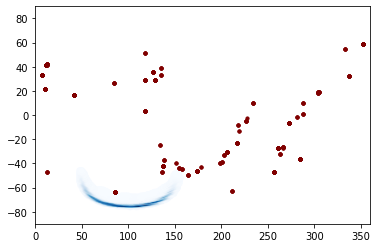

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

dir = 'gw150914'
probmap = pd.read_csv(dir + '/probmap.csv')
probmaplikely = probmap[(probmap.prob > 0.0001)]

df = pd.DataFrame()
file = open(dir + '/data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes

overlapras = []
overlapdecs = []
plt.figure()
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
for i, row in df.iterrows():
#     if np.linalg.norm([prow['ra']-row['ra'], prow['dec']-row['dec']]) < 0.5:
#         plt.scatter(row['ra'], row['dec'], s=10, color='black', marker='X')
#     else:
    plt.scatter(row['ra'], row['dec'], s=10, color='maroon')
plt.show()
plt.clf()

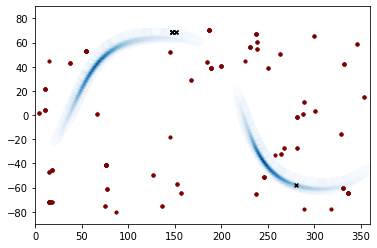

<Figure size 432x288 with 0 Axes>

In [12]:
dir = 'gw151012'
probmap = pd.read_csv(dir + '/probmap.csv')
probmaplikely = probmap[(probmap.prob > 0.0001)]

df = pd.DataFrame()
file = open(dir + '/data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes

overlapras = []
overlapdecs = []
plt.figure()
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
for i, row in df.iterrows():
    if (row['ra']>130 and row['ra']<165 and row['dec']>57 and row['dec']<70):
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    elif (row['ra']>260 and row['ra']<300 and row['dec']>-70 and row['dec']<-50):
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    else:
        plt.scatter(row['ra'], row['dec'], s=10, color='maroon')
plt.show()
plt.clf()

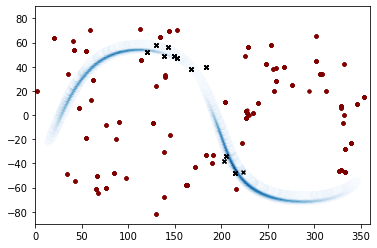

<Figure size 432x288 with 0 Axes>

In [35]:
dir = 'gw151226'
probmap = pd.read_csv(dir + '/probmap.csv')
probmaplikely = probmap[(probmap.prob > 0.0001)]

df = pd.DataFrame()
file = open(dir + '/data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes

overlapras = []
overlapdecs = []
plt.figure()
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
for i, row in df.iterrows():
    if row['ra']>110 and row['ra']<165 and row['dec']>47 and row['dec']<60:
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    elif (row['ra']>200 and row['ra']<230 and row['dec']>-60 and row['dec']<-30):
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    elif (row['ra']>150 and row['ra']<200 and row['dec']>20 and row['dec']<40):
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    else:
        plt.scatter(row['ra'], row['dec'], s=10, color='maroon')
plt.show()
plt.clf()

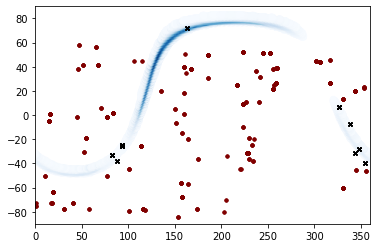

<Figure size 432x288 with 0 Axes>

In [38]:
dir = 'gw170104'
probmap = pd.read_csv(dir + '/probmap.csv')
probmaplikely = probmap[(probmap.prob > 0.0001)]

df = pd.DataFrame()
file = open(dir + '/data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes

overlapras = []
overlapdecs = []
plt.figure()
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
for i, row in df.iterrows():
    if row['ra']>70 and row['ra']<100 and row['dec']>-50 and row['dec']<-20:
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    elif (row['ra']>150 and row['ra']<170 and row['dec']>60 and row['dec']<90):
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    elif (row['ra']>300 and row['ra']<360 and row['dec']>-42 and row['dec']<10):
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    else:
        plt.scatter(row['ra'], row['dec'], s=10, color='maroon')
plt.show()
plt.clf()

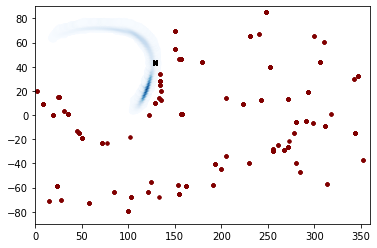

<Figure size 432x288 with 0 Axes>

In [40]:
dir = 'gw170608'
probmap = pd.read_csv(dir + '/probmap.csv')
probmaplikely = probmap[(probmap.prob > 0.0001)]

df = pd.DataFrame()
file = open(dir + '/data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes

overlapras = []
overlapdecs = []
plt.figure()
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
for i, row in df.iterrows():
    if row['ra']>100 and row['ra']<130 and row['dec']>40 and row['dec']<50:
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    else:
        plt.scatter(row['ra'], row['dec'], s=10, color='maroon')
plt.show()
plt.clf()

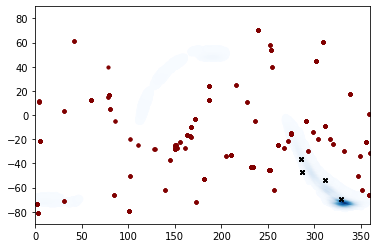

<Figure size 432x288 with 0 Axes>

In [43]:
dir = 'gw170729'
probmap = pd.read_csv(dir + '/probmap.csv')
probmaplikely = probmap[(probmap.prob > 0.0001)]

df = pd.DataFrame()
file = open(dir + '/data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes

overlapras = []
overlapdecs = []
plt.figure()
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
for i, row in df.iterrows():
    if row['ra']>265 and row['ra']<340 and row['dec']>-75 and row['dec']<-30:
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    else:
        plt.scatter(row['ra'], row['dec'], s=10, color='maroon')
plt.show()
plt.clf()

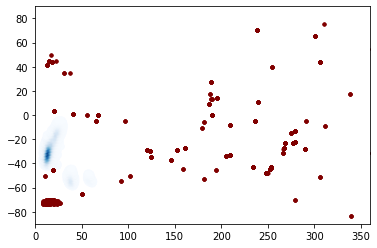

<Figure size 432x288 with 0 Axes>

In [45]:
dir = 'gw170809'
probmap = pd.read_csv(dir + '/probmap.csv')
probmaplikely = probmap[(probmap.prob > 0.0001)]

df = pd.DataFrame()
file = open(dir + '/data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes

overlapras = []
overlapdecs = []
plt.figure()
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
for i, row in df.iterrows():
#     if row['ra']>265 and row['ra']<340 and row['dec']>-75 and row['dec']<-30:
#         plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
#     else:
    plt.scatter(row['ra'], row['dec'], s=10, color='maroon')
plt.show()
plt.clf()

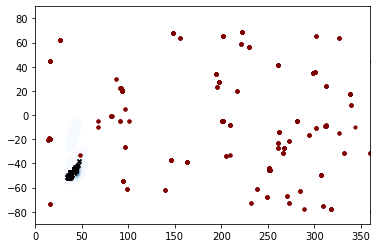

<Figure size 432x288 with 0 Axes>

In [49]:
dir = 'gw170814'
probmap = pd.read_csv(dir + '/probmap.csv')
probmaplikely = probmap[(probmap.prob > 0.0001)]

df = pd.DataFrame()
file = open(dir + '/data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes

overlapras = []
overlapdecs = []
plt.figure()
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
for i, row in df.iterrows():
    if row['ra']>25 and row['ra']<60 and row['dec']>-60 and row['dec']<-35:
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    else:
        plt.scatter(row['ra'], row['dec'], s=10, color='maroon')
plt.show()
plt.clf()

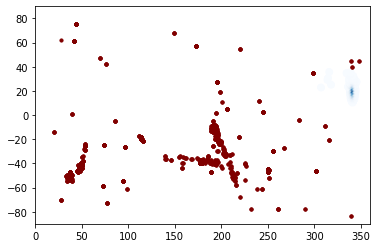

<Figure size 432x288 with 0 Axes>

In [51]:
dir = 'gw170818'
probmap = pd.read_csv(dir + '/probmap.csv')
probmaplikely = probmap[(probmap.prob > 0.0001)]

df = pd.DataFrame()
file = open(dir + '/data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes

overlapras = []
overlapdecs = []
plt.figure()
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
for i, row in df.iterrows():
    plt.scatter(row['ra'], row['dec'], s=10, color='maroon')
plt.show()
plt.clf()

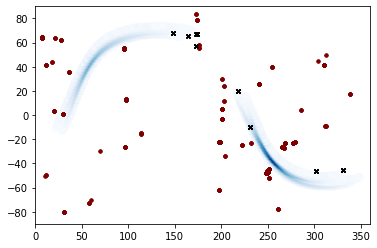

<Figure size 432x288 with 0 Axes>

In [55]:
dir = 'gw170823'
probmap = pd.read_csv(dir + '/probmap.csv')
probmaplikely = probmap[(probmap.prob > 0.0001)]

df = pd.DataFrame()
file = open(dir + '/data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes

overlapras = []
overlapdecs = []
plt.figure()
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
for i, row in df.iterrows():
    if row['ra']>120 and row['ra']<175 and row['dec']>40 and row['dec']<70:
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    elif row['ra']>208 and row['ra']<240 and row['dec']>-20 and row['dec']<20:
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    elif row['ra']>295 and row['ra']<360 and row['dec']>-60 and row['dec']<-40:
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    else:
        plt.scatter(row['ra'], row['dec'], s=10, color='maroon')
plt.show()
plt.clf()

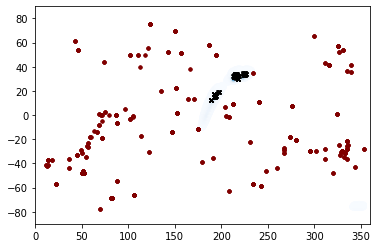

<Figure size 432x288 with 0 Axes>

In [58]:
dir = 'gw190412'
probmap = pd.read_csv(dir + '/probmap.csv')
probmaplikely = probmap[(probmap.prob > 0.0001)]

df = pd.DataFrame()
file = open(dir + '/data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes

overlapras = []
overlapdecs = []
plt.figure()
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
for i, row in df.iterrows():
    if row['ra']>200 and row['ra']<230 and row['dec']>15 and row['dec']<35:
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    elif row['ra']>180 and row['ra']<200 and row['dec']>0 and row['dec']<25:
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    else:
        plt.scatter(row['ra'], row['dec'], s=10, color='maroon')
plt.show()
plt.clf()

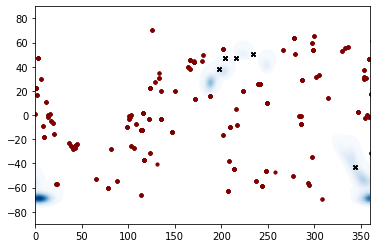

<Figure size 432x288 with 0 Axes>

In [63]:
dir = 'gw190521'
probmap = pd.read_csv(dir + '/probmap.csv')
probmaplikely = probmap[(probmap.prob > 0.0001)]

df = pd.DataFrame()
file = open(dir + '/data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes

overlapras = []
overlapdecs = []
plt.figure()
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
for i, row in df.iterrows():
    if row['ra']>195 and row['ra']<245 and row['dec']>26 and row['dec']<54:
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    elif row['ra']>295 and row['ra']<360 and row['dec']>-60 and row['dec']<-40:
        plt.scatter(row['ra'], row['dec'], s=15, color='black', marker='x')
    else:
        plt.scatter(row['ra'], row['dec'], s=10, color='maroon')
plt.show()
plt.clf()

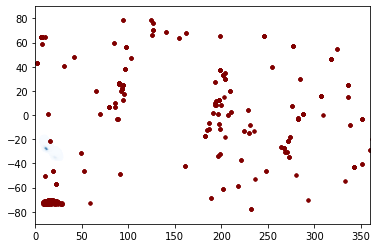

<Figure size 432x288 with 0 Axes>

In [65]:
dir = 'gw190814'
probmap = pd.read_csv(dir + '/probmap.csv')
probmaplikely = probmap[(probmap.prob > 0.0001)]

df = pd.DataFrame()
file = open(dir + '/data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes

overlapras = []
overlapdecs = []
plt.figure()
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
for i, row in df.iterrows():
    plt.scatter(row['ra'], row['dec'], s=10, color='maroon')
plt.show()
plt.clf()

In [79]:
for i in range(len(gws)):
    print(i)
    for boundingset in boundingsets[i]:
        print(boundingset)

0
1
[130, 165, 57, 70]
[260, 300, -70, -50]
2
[110, 165, 47, 60]
[200, 230, -60, -30]
[150, 200, 20, 40]
3
[70, 100, -50, -20]
[150, 170, 60, 90]
[300, 360, -42, 10]
4
[100, 130, 40, 50]
5
[265, 340, -75, -30]
6
7
[25, 60, -60, -35]
8
9
[120, 175, 40, 70]
[208, 240, -20, 20]
[295, 360, -60, -40]
10
[200, 230, 15, 35]
[180, 200, 0, 25]
11
[195, 245, 26, 54]
[295, 360, -60, -40]
12


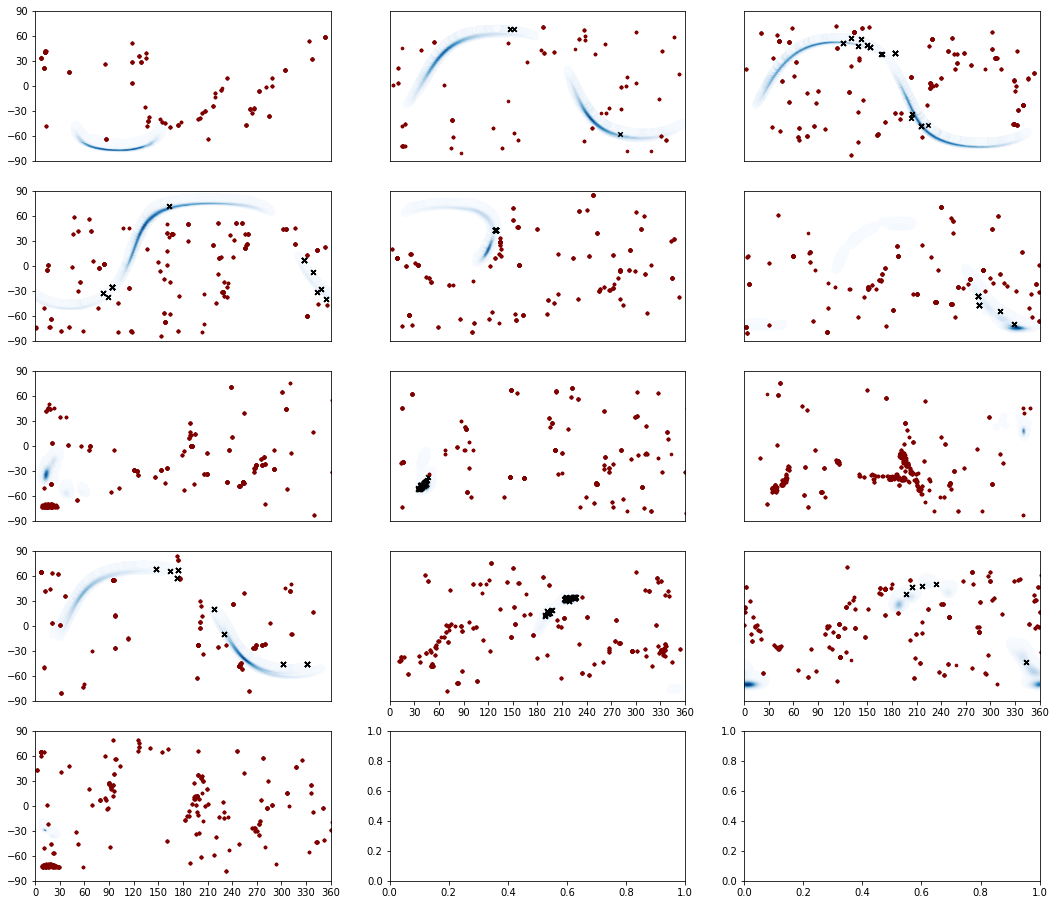

In [86]:
boundingsets = [[], [[130, 165, 57, 70], [260, 300, -70, -50]], [[110, 165, 47, 60], [200, 230, -60, -30], [150,200,20,40]],
               [[70,100,-50,-20], [150,170,60,90],[300,360,-42,10]], [[100,130,40,50]], [[265,340,-75,-30]],
                [], [[25,60,-60,-35]], [], [[120,175,40,70],[208,240,-20,20],[295,360,-60,-40]],
                [[200,230,15,35],[180,200,0,25]], [[195,245,26,54],[295,360,-60,-40]], []]
gws = ['150914', '151012', '151226', '170104', '170608', '170729', '170809', '170814', '170818', '170823',
      '190412', '190521', '190814']

fig, ax = plt.subplots(5,3, figsize=(18,16))
for i in range(len(gws)):
    df = pd.DataFrame()
    file = open('gw' + gws[i] + '/data.txt', 'r')
    tids = []
    oids = []
    ras = []
    decs = []
    stimes = []
    modes = []
    for line in file.readlines():
        arr = line.split()
        tids.append(arr[0])
        oids.append(arr[1])
        ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
        decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
        stimes.append(arr[8] + ' ' + arr[9])
        modes.append(arr[12])
    df['targetid'] = tids
    df['obsid'] = oids
    df['ra'] = ras
    df['dec'] = decs
    df['start time'] = stimes
    df['mode'] = modes
    
    probmap = pd.read_csv('gw' + gws[i] + '/probmap.csv')
    probmaplikely = probmap[(probmap.prob > 0.0001)]
    
    ax[i//3][i%3].set_xlim(0, 360)
    ax[i//3][i%3].set_ylim(-90, 90)
    ax[i//3][i%3].scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap='Blues')
    if i%3 == 0:
        ax[i//3][i%3].set_yticks(range(-90, 91, 30))
    else:
        ax[i//3][i%3].set_yticks([])
    if i in [10, 11, 12]:
        ax[i//3][i%3].set_xticks(range(0, 361, 30))
    else:
        ax[i//3][i%3].set_xticks([])
    for idx, row in df.iterrows():
        bounded = False
        for boundingset in boundingsets[i]:
            if row['ra']>boundingset[0] and row['ra']<boundingset[1] and row['dec']>boundingset[2] and row['dec']<boundingset[3]:
                ax[i//3][i%3].scatter(row['ra'], row['dec'], s=20, color='black', marker='x')
                bounded = True
        if not bounded:
            ax[i//3][i%3].scatter(row['ra'], row['dec'], s=7, color='maroon')